In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"C:\Users\rhlbh\OneDrive\Documents\Projects\Titanic Datasets\train.csv") #load the data from the system

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Exploring the data

## Categorical Variables

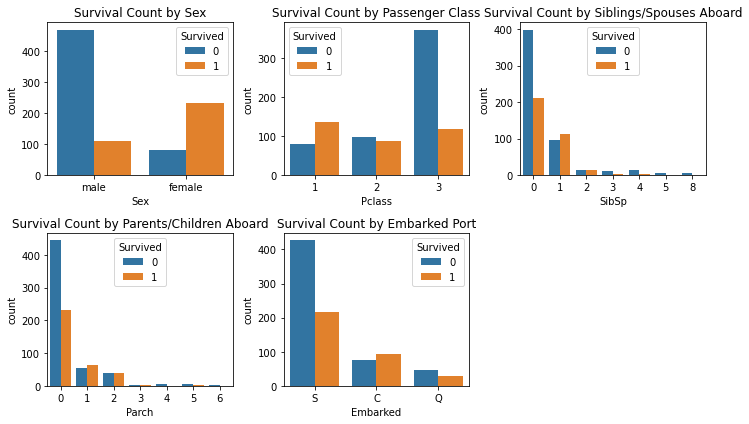

In [4]:
plt.figure(figsize=(10, 6))

plt.subplot(231)
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title('Survival Count by Sex')

plt.subplot(232)
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title('Survival Count by Passenger Class')

plt.subplot(233)
sns.countplot(x="SibSp", hue="Survived", data=train)
plt.title('Survival Count by Siblings/Spouses Aboard')

plt.subplot(234)
sns.countplot(x="Parch", hue="Survived", data=train)
plt.title('Survival Count by Parents/Children Aboard')

plt.subplot(235)
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.title('Survival Count by Embarked Port')

plt.tight_layout()
plt.show()

## Numerical Variables

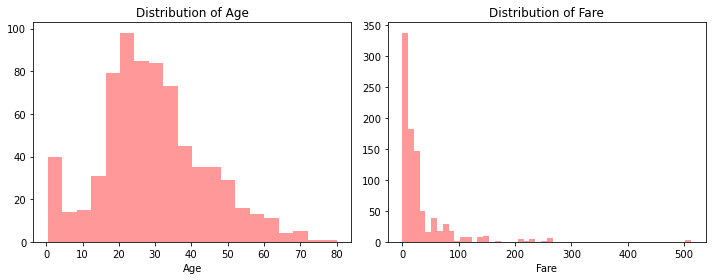

In [5]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.distplot(train['Age'], kde=False, color='red')
plt.title('Distribution of Age')

plt.subplot(122)
sns.distplot(train['Fare'], kde=False, color='red')
plt.title('Distribution of Fare')

plt.tight_layout()
plt.show()

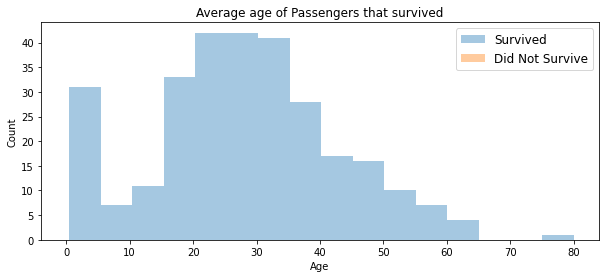

In [6]:
plt.figure(figsize=(10, 4))

train = train[train['Survived'] == 1]
sns.distplot(train['Age'], kde=False, label='Survived')

train = train[train['Survived'] == 0]
sns.distplot(train['Age'], kde=False, label='Did Not Survive')

plt.legend(prop={'size': 12})
plt.title('Average age of Passengers that survived')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

# Combining the test and train files

In [7]:
import pandas as pd
train = pd.read_csv(r"C:\Users\rhlbh\OneDrive\Documents\Projects\Titanic Datasets\train.csv")
test = pd.read_csv(r"C:\Users\rhlbh\OneDrive\Documents\Projects\Titanic Datasets\test.csv")
combined = pd.concat([train.drop('Survived',axis=1),test])

In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

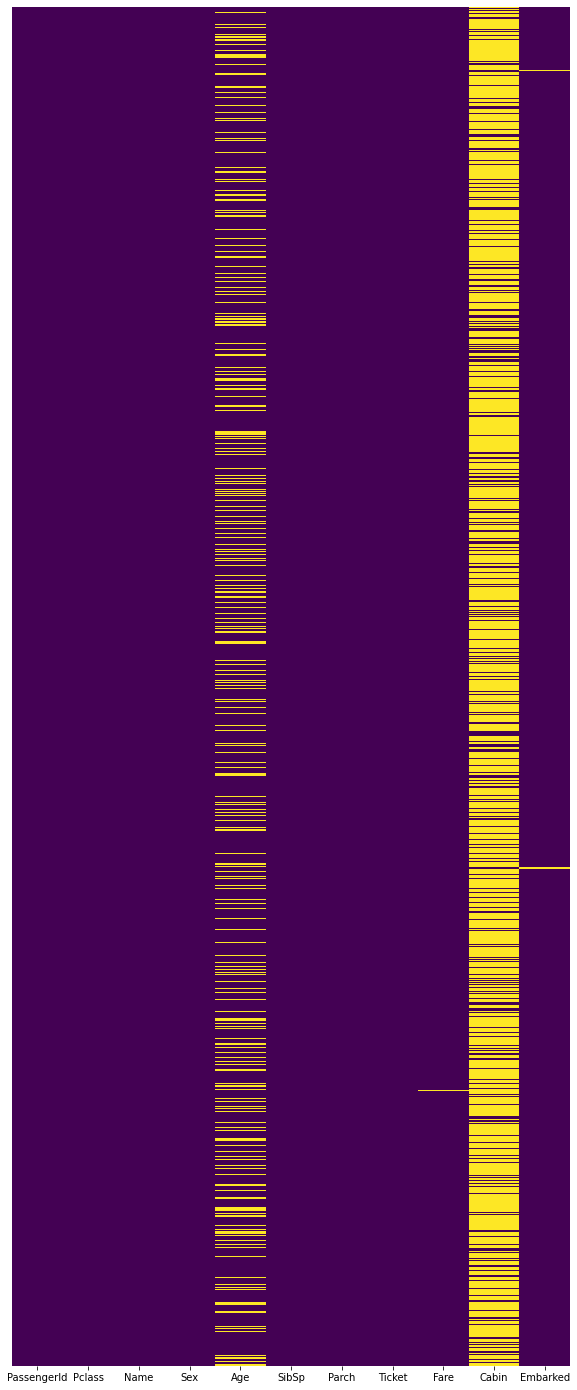

In [9]:
%matplotlib inline
plt.figure(figsize=(10,25))
sns.heatmap(combined.isnull(),cmap="viridis",yticklabels=False,cbar=False)

In [10]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [11]:
# Imputing missing age values
train['Age'].fillna(train['Age'].median(), inplace=True)

# Imputing missing embarked values
train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace=True)

# Creating a dictionary to convert Passenger Class from 1,2,3 to 1st,2nd,3rd.
pclass_mapping = {1: '1st', 2: '2nd', 3: '3rd'}

# Mapping the column based on the dictionary
train['Pclass'] = train['Pclass'].map(pclass_mapping)

# Dropping unnecessary columns and getting dummies of categorical variables
train.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [12]:
#Check the clean version of the train data.
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Train Test Split

In [14]:
# Splitting Features and Label
y = train['Survived']
X = train.drop(['Survived'],1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting Model And Train

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    # Add more hyperparameters to tune as needed
}

# Create GradientBoostingClassifier model
model = GradientBoostingClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = best_model.predict(X_test)


# Confusion Matrix and Classification Reports

In [16]:
# Print confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[144  13]
 [ 37  74]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.67      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



# Logistic Regression Model 

In [17]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid for hyperparameter tuning for both models
gb_param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    # Add more GradientBoostingClassifier hyperparameters to tune as needed
}

lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    # Add more LogisticRegression hyperparameters to tune as needed
}

# Create the classifiers
gb_model = GradientBoostingClassifier()
lr_model = LogisticRegression()

# Perform GridSearchCV for hyperparameter tuning for both models
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, n_jobs=-1)
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, n_jobs=-1)

# Fit the models to the training data
gb_grid_search.fit(X_train, y_train)
lr_grid_search.fit(X_train, y_train)

# Get the best models and their parameters
best_gb_model = gb_grid_search.best_estimator_
best_lr_model = lr_grid_search.best_estimator_
best_gb_params = gb_grid_search.best_params_
best_lr_params = lr_grid_search.best_params_

# Train the best models on the entire training data
best_gb_model.fit(X_train, y_train)
best_lr_model.fit(X_train, y_train)

# Make predictions using the best models
gb_predictions = best_gb_model.predict(X_test)
lr_predictions = best_lr_model.predict(X_test)

print("\nLogistic Regression Classifier:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))



Logistic Regression Classifier:
[[139  18]
 [ 34  77]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.81      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



# Random Forest Classifier And Decision Trees

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Define parameter grids for hyperparameter tuning for each model
gb_param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    # Add more GradientBoostingClassifier hyperparameters to tune as needed
}

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    # Add more RandomForestClassifier hyperparameters to tune as needed
}

lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    # Add more LogisticRegression hyperparameters to tune as needed
}

dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    # Add more DecisionTreeClassifier hyperparameters to tune as needed
}

# Create the classifiers
gb_model = GradientBoostingClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

# Perform GridSearchCV for hyperparameter tuning for each model
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, n_jobs=-1)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, n_jobs=-1)
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, n_jobs=-1)

# Fit the models to the training data
gb_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)
lr_grid_search.fit(X_train, y_train)
dt_grid_search.fit(X_train, y_train)

# Get the best models and their parameters
best_gb_model = gb_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_
best_lr_model = lr_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_

best_gb_params = gb_grid_search.best_params_
best_rf_params = rf_grid_search.best_params_
best_lr_params = lr_grid_search.best_params_
best_dt_params = dt_grid_search.best_params_

# Train the best models on the entire training data
best_gb_model.fit(X_train, y_train)
best_rf_model.fit(X_train, y_train)
best_lr_model.fit(X_train, y_train)
best_dt_model.fit(X_train, y_train)

# Make predictions using the best models
gb_predictions = best_gb_model.predict(X_test)
rf_predictions = best_rf_model.predict(X_test)
lr_predictions = best_lr_model.predict(X_test)
dt_predictions = best_dt_model.predict(X_test)

# Print confusion matrices and classification reports for each model
from sklearn.metrics import confusion_matrix, classification_report


print("\nRandom Forest Classifier:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


print("\nDecision Tree Classifier:")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))



Random Forest Classifier:
[[147  10]
 [ 37  74]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       157
           1       0.88      0.67      0.76       111

    accuracy                           0.82       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268


Decision Tree Classifier:
[[140  17]
 [ 37  74]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.81      0.67      0.73       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



# Cleaning The Test DataSet

In [19]:
# Print the column names in the test DataFrame
print(test.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [20]:
# Input the missing values for age and fare
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Pclass dictionary
pclass_mapping = {1: '1st', 2: '2nd', 3: '3rd'}
test['Pclass'] = test['Pclass'].map(pclass_mapping)
ids = test[['PassengerId']]# Passenger Ids

# Drop Unnecessary Columns
test.drop(['PassengerId','Name','Ticket','Cabin'], 1, inplace=True)

# Get dummies of categorical variables
categorical_vars = test[['Pclass','Sex','Embarked']]
dummies = pd.get_dummies(categorical_vars,drop_first=True)

# Drop the original categorical variables and concat new dummy variables
test = test.drop(['Pclass','Sex','Embarked'],axis=1)
test = pd.concat([test,dummies],axis=1)
#test.head()


# Prediction File

In [23]:
predictions = best_model.predict(test)
results = ids.assign(Survived=predictions)
results.to_csv('titanic_submission.csv',index=False)